In [86]:
# have to install once on computer
#!pip install tensorflow tensorflow_decision_forests

     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     --------------------------------------- 0.0/15.2 MB 320.0 kB/s eta 0:00:48
     ---------------------------------------- 0.1/15.2 MB 1.6 MB/s eta 0:00:10
     - -------------------------------------- 0.6/15.2 MB 4.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/15.2 MB 9.2 MB/s eta 0:00:02
     ------ --------------------------------- 2.4/15.2 MB 11.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.7/15.2 MB 10.2 MB/s eta 0:00:02
     --------- ------------------------------ 3.6/15.2 MB 11.4 MB/s eta 0:00:02
     ----------- ---------------------------- 4.5/15.2 MB 12.6 MB/s eta 0:00:01
     -------------- ------------------------- 5.6/15.2 MB 13.8 MB/s eta 0:00:01
     ----------------- ---------------------- 6.7/15.2 MB 14.8 MB/s eta 0:00:01
     -------------------- ------------------- 7.8/15.2 MB 15.7 MB/s eta 0:00:01
     ----------------------- ---------------- 8.9/1

In [5]:
import pandas as pd

df = pd.read_csv("bankPayments.csv")
df = df.drop('step', axis = 1)
df.head()


customer  age gender zipcodeOri       merchant zipMerchant  \
0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0

In [59]:
import seaborn as sns
import numpy as np
import torch
from torch import nn
from torch import manual_seed

In [60]:
df1 = df[["gender", "fraud"]]
df1.groupby("gender").aggregate('sum')

fraud
gender       
'E'         7
'F'      4758
'M'      2435
'U'         0

In [61]:
df2 = df[["category", "fraud"]]
df2.groupby("category").aggregate('sum')

fraud
category                      
'es_barsandrestaurants'    120
'es_contents'                0
'es_fashion'               116
'es_food'                    0
'es_health'               1696
'es_home'                  302
'es_hotelservices'         548
'es_hyper'                 280
'es_leisure'               474
'es_otherservices'         228
'es_sportsandtoys'        1982
'es_tech'                  158
'es_transportation'          0
'es_travel'                578
'es_wellnessandbeauty'     718

c:\Users\oscar\anaconda3\envs\ml-0451\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Count'>

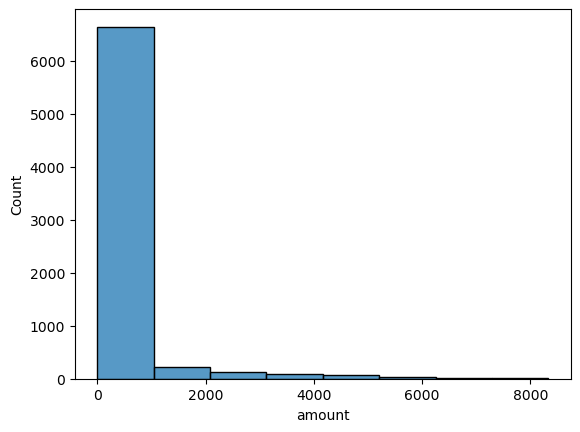

In [62]:
df3 = df[["amount", "fraud"]]
df3 = df3[df3["fraud"] == 1]
sns.histplot(data=df3, x="amount", bins=8)
#df3['cat_age'] = np.select([df2.amount < 2000, df2.amount < 4000, df2.amount < 6000, df2.amount < 8000], ['<2000', '2000-4000','4000-6000','6000-8000'], '>8000')

In [63]:
df.head()
print(len(df[df['fraud'] == 0]))
print(len(df[df['fraud'] == 1]))

587443
7200


In [64]:
from sklearn import model_selection
from prepareData import PrepareData

features = ['gender', 'category', 'amount']

X = df[features]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']
X['label'] = df['fraud']

n_features = X.shape[1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

train_data = PrepareData(X_train, y_train)
test_data = PrepareData(X_test, y_test)



In [65]:
pair = len(np.where(y_train == 0)[0]), len(np.where(y_train == 1)[0])
print(f'label train 0/1: {pair[0]}/{pair[1]}')


label train 0/1: 393581/4829


In [66]:
from torch.utils.data import DataLoader, WeightedRandomSampler

class_counts = y_train.value_counts()
class_weights = 1./class_counts

sample_weights = [1./class_counts[i] for i in y_train]
print(sample_weights)

sampler = WeightedRandomSampler(weights = sample_weights, num_samples = len(y_train), replacement = True)

train_dataloader = DataLoader(train_data, batch_size = 500, sampler = sampler)

# confirmation of proper batch distribution
#for i, (features, labels) in enumerate(train_dataloader):
    #print(f'Batch: {i}, label train 0/1: {len(np.where(labels.numpy() == 0)[0])}, {len(np.where(labels.numpy() == 1)[0])}')


[2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556099e-06, 2.5407730556

In [80]:
from logRegModel import LogisticRegression

# instantiating logistic regression model
LR = LogisticRegression(n_features, 150)

# loss and optimizer
alpha = 0.001
loss_fn = nn.BCELoss()
opt = torch.optim.SGD(LR.parameters(), lr = alpha)

In [81]:
def calculate_accuracy(preds, actuals):

    with torch.no_grad():
        rounded_preds = torch.round(preds)
        n_correct = torch.sum(rounded_preds == actuals)
    return n_correct/len(preds)

In [82]:
manual_seed(10)

# training loop
n_epochs = 2000

for epoch in range(n_epochs):
    
    features, labels = next(iter(train_dataloader))

    train_preds = LR(features)
    train_loss = loss_fn(train_preds, labels)

    train_acc = calculate_accuracy(train_preds, labels)

    # backwards propagation
    opt.zero_grad()
    train_loss.backward()

    # update w
    opt.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch: {epoch+1}, Loss = {train_loss.item():.3f}, Accuracy = {train_acc.item():.2f}')


Epoch: 100, Loss = 1.833, Accuracy = 0.52
Epoch: 200, Loss = 0.500, Accuracy = 0.56
Epoch: 300, Loss = 0.463, Accuracy = 0.87
Epoch: 400, Loss = 0.486, Accuracy = 0.66
Epoch: 500, Loss = 0.454, Accuracy = 0.72
Epoch: 600, Loss = 0.419, Accuracy = 0.77
Epoch: 700, Loss = 0.456, Accuracy = 0.77
Epoch: 800, Loss = 0.444, Accuracy = 0.80
Epoch: 900, Loss = 0.459, Accuracy = 0.85
Epoch: 1000, Loss = 0.426, Accuracy = 0.83
Epoch: 1100, Loss = 0.452, Accuracy = 0.88
Epoch: 1200, Loss = 0.498, Accuracy = 0.70
Epoch: 1300, Loss = 0.444, Accuracy = 0.91
Epoch: 1400, Loss = 0.463, Accuracy = 0.82
Epoch: 1500, Loss = 0.434, Accuracy = 0.84
Epoch: 1600, Loss = 0.444, Accuracy = 0.80
Epoch: 1700, Loss = 0.473, Accuracy = 0.86
Epoch: 1800, Loss = 0.412, Accuracy = 0.90
Epoch: 1900, Loss = 0.459, Accuracy = 0.84
Epoch: 2000, Loss = 0.629, Accuracy = 0.87


In [83]:
test_preds = LR(test_data.X)
print(calculate_accuracy(test_preds, test_data.y))

tensor(0.7971)


In [84]:
from sklearn.metrics import confusion_matrix

train_preds = LR(train_data.X)

y_train_np = train_data.y.detach().numpy()
y_preds_np = train_preds.detach().numpy()

tn, fp, fn, tp = confusion_matrix(y_true= y_train_np, y_pred= np.round(y_preds_np)).ravel()

print(f'True Positive Rate on Training Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Training Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Training Data = 95.61%
True Negative Rate on Training Data = 79.46%


In [85]:
test_preds = LR(test_data.X)

y_test_np = test_data.y.detach().numpy()
y_preds_np = test_preds.detach().numpy()

tn, fp, fn, tp = confusion_matrix(y_true= y_test_np, y_pred= np.round(y_preds_np)).ravel()

print(f'True Positive Rate on Testing Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data = 95.70%
True Negative Rate on Testing Data = 79.51%


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier(random_state=0)

In [18]:
len(set(df['zipMerchant']))

1

In [20]:
print(df.columns)
cols = df.columns
cols = cols.drop(['customer', 'zipcodeOri', 'zipMerchant', 'fraud'])
X = df[cols]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']

Index(['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant',
       'category', 'amount', 'fraud'],
      dtype='object')


array([0.99019591, 0.99223072, 0.99320609, 0.99367685, 0.9942318 ,
       0.99443361, 0.99500538, 0.99508947, 0.99539217, 0.99505583])

In [22]:
tree_model.fit(X, y)

array([7.31178773e-01, 5.24104026e-04, 4.33689699e-03, 8.89228034e-03,
       7.06305131e-03, 7.46584913e-03, 4.70474355e-03, 3.05817753e-03,
       6.60013876e-05, 1.48742019e-04, 6.29815193e-03, 5.40892440e-03,
       0.00000000e+00, 2.59495109e-02, 0.00000000e+00, 7.92423702e-03,
       0.00000000e+00, 0.00000000e+00, 1.49508660e-03, 1.76638664e-03,
       2.03876380e-03, 1.38316370e-04, 2.65931534e-03, 2.12474250e-03,
       0.00000000e+00, 3.15242303e-04, 0.00000000e+00, 3.67541088e-03,
       2.75399493e-03, 6.10198458e-04, 2.61237681e-04, 0.00000000e+00,
       6.84908015e-04, 1.43258133e-03, 6.69548707e-03, 2.09140352e-03,
       1.83149698e-02, 0.00000000e+00, 2.69892984e-03, 1.69054047e-04,
       8.26895507e-04, 3.57254989e-03, 1.15284890e-04, 0.00000000e+00,
       1.35896685e-04, 0.00000000e+00, 1.03839535e-03, 2.01301367e-02,
       2.35343348e-03, 4.06530138e-04, 1.68804318e-03, 0.00000000e+00,
       9.64760617e-04, 2.74597579e-03, 2.17506484e-04, 5.98241532e-04,
      

In [23]:
cross_val_score(tree_model, X, y, cv = 10)

array([0.99019591, 0.99223072, 0.99320609, 0.99367685, 0.9942318 ,
       0.99443361, 0.99500538, 0.99508947, 0.99539217, 0.99505583])

In [26]:
from sklearn.metrics import confusion_matrix

train_preds = tree_model.predict(X)
y_true = y

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= train_preds).ravel()
print(f'True Positive Rate on Dataset = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Dataset = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Dataset = 99.60%
True Negative Rate on Dataset = 100.00%


In [52]:
import numpy as np
assert len(X.columns) == len(tree_model.feature_importances_)

data = {
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}
imp = pd.DataFrame(data).sort_values(by= 'importance', axis = 0, ascending = False)

In [53]:
imp.head()

feature  importance
0                   amount    0.731179
62   merchant_'M980657600'    0.058610
13  merchant_'M1053599405'    0.025950
47   merchant_'M480139044'    0.020130
36  merchant_'M1913465890'    0.018315